<a href="https://colab.research.google.com/github/AdnanSakal/Image_Classification/blob/main/image_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os
import random

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "Sea animals image"

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
vencerlanz09/sea-animals-image-dataste                        Sea Animals Image Dataset🌊                          312MB  2023-03-20 06:27:17          10111        211  0.875            
vencerlanz09/insect-village-synthetic-dataset                 Insect Village Synthetic Dataset                    435MB  2022-08-23 15:14:29           2298         79  0.875            
vencerlanz09/reptiles-and-amphibians-image-dataset            Reptiles and Amphibians Image Dataset 🦎🐢            135MB  2022-08-31 09:02:01            971         80  0.875            
crowww/a-large-scale-fish-dataset                             A Large 

In [ ]:
!kaggle datasets download -d "vencerlanz09/sea-animals-image-dataste"

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste
License(s): other
 97% 303M/312M [00:03<00:00, 150MB/s]
100% 312M/312M [00:03<00:00, 97.1MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/sea-animals-image-dataste.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

main_dir = "/content"


all_folder = os.listdir("/content")[1:-1]
all_folder.remove("sea-animals-image-dataste.zip")
all_folder.remove("kaggle.json")
all_folder = [f for f in all_folder if f not in ['train', 'test']]

train_dir = os.path.join(main_dir,"train_data")
test_dir = os.path.join(main_dir,"test_data")

os.makedirs(train_dir,exist_ok = True)
os.makedirs(test_dir,exist_ok = True)

def split_and_move_files(folder):
  folder_path = os.path.join(main_dir,folder)
  files = [f for f in os.listdir(folder_path)]

  train_size = int(0.8*len(files))
  train_file =  files[:train_size]
  test_file = files[train_size:]

  train_folder_path = os.path.join(train_dir,folder)
  test_folder_path = os.path.join(test_dir,folder)

  os.makedirs(train_folder_path,exist_ok = True)
  os.makedirs(test_folder_path,exist_ok = True)

  for files in train_file:
    shutil.move(os.path.join(folder_path,files),os.path.join(train_folder_path,files))


  for files in test_file:
    shutil.move(os.path.join(folder_path,files),os.path.join(test_folder_path,files))

for folder in all_folder:
  split_and_move_files(folder)

In [ ]:
for directory,dirpath,filename in os.walk("/content/train_data/"):
  print(f"there are {len(dirpath)} and {len(filename)} images in {directory}")

there are 23 and 0 images in /content/train_data/
there are 0 and 397 images in /content/train_data/Clams
there are 0 and 386 images in /content/train_data/Squid
there are 0 and 382 images in /content/train_data/Seahorse
there are 0 and 625 images in /content/train_data/Dolphin
there are 0 and 385 images in /content/train_data/Penguin
there are 0 and 397 images in /content/train_data/Eel
there are 0 and 457 images in /content/train_data/Whale
there are 0 and 399 images in /content/train_data/Crabs
there are 0 and 399 images in /content/train_data/Lobster
there are 0 and 676 images in /content/train_data/Jelly Fish
there are 0 and 463 images in /content/train_data/Sea Urchins
there are 0 and 449 images in /content/train_data/Octopus
there are 0 and 472 images in /content/train_data/Sharks
there are 0 and 424 images in /content/train_data/Puffers
there are 0 and 400 images in /content/train_data/Corals
there are 0 and 395 images in /content/train_data/Fish
there are 0 and 413 images in /

In [ ]:
for directory,dirpath,filename in os.walk("/content/test_data/"):
  print(f"there are {len(dirpath)} and {len(filename)} images in {directory}")

there are 23 and 0 images in /content/test_data/
there are 0 and 100 images in /content/test_data/Clams
there are 0 and 97 images in /content/test_data/Squid
there are 0 and 96 images in /content/test_data/Seahorse
there are 0 and 157 images in /content/test_data/Dolphin
there are 0 and 97 images in /content/test_data/Penguin
there are 0 and 100 images in /content/test_data/Eel
there are 0 and 115 images in /content/test_data/Whale
there are 0 and 100 images in /content/test_data/Crabs
there are 0 and 100 images in /content/test_data/Lobster
there are 0 and 169 images in /content/test_data/Jelly Fish
there are 0 and 116 images in /content/test_data/Sea Urchins
there are 0 and 113 images in /content/test_data/Octopus
there are 0 and 118 images in /content/test_data/Sharks
there are 0 and 107 images in /content/test_data/Puffers
there are 0 and 100 images in /content/test_data/Corals
there are 0 and 99 images in /content/test_data/Fish
there are 0 and 104 images in /content/test_data/Sea

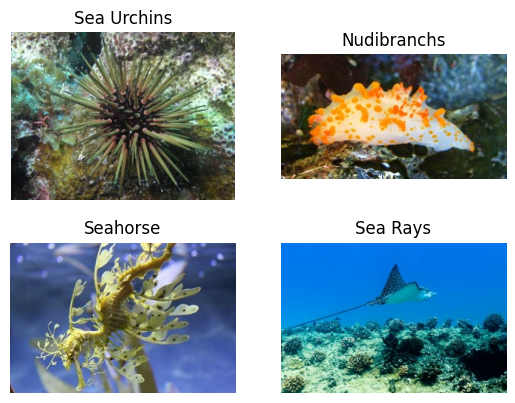

In [ ]:
for i in range(4):
  plt.subplot(2,2,i+1)
  rand_dir = random.choice(["/content/train_data","/content/test_data"])
  sub_dir = random.choice(os.listdir(rand_dir))
  filename = random.choice(os.listdir(os.path.join(rand_dir,sub_dir,)))
  img = tf.io.read_file(os.path.join(rand_dir,sub_dir,filename))
  img = tf.io.decode_image(img,channels = 3)
  plt.imshow(img)
  plt.title(sub_dir)
  plt.axis(False)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/train_data"
test_dir = "/content/test_data"

train_gen = ImageDataGenerator(rescale = 1/255.)
test_gen = ImageDataGenerator(rescale = 1/255.)

train_data = train_gen.flow_from_directory(directory = train_dir,
                                           class_mode = "categorical",
                                           target_size = [224,224],

                                           )

test_data = test_gen.flow_from_directory(directory = test_dir,
                                           class_mode = "categorical",
                                           target_size = [224,224],
                                           )

Found 10961 images belonging to 23 classes.
Found 2750 images belonging to 23 classes.


In [ ]:
input = tf.keras.layers.Input(shape = [224,224,3])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(23,activation = "softmax")(x)

model_0 = tf.keras.Model(input,output)
model_0.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_0 = model_0.fit(train_data,
                    epochs  = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_0",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
343/343 [==============================] - 41s 103ms/step - loss: 2.6996 - accuracy: 0.2338 - val_loss: 2.4015 - val_accuracy: 0.2855
Epoch 2/10
343/343 [==============================] - 32s 92ms/step - loss: 2.2593 - accuracy: 0.3267 - val_loss: 2.2383 - val_accuracy: 0.3193
Epoch 3/10
343/343 [==============================] - 32s 93ms/step - loss: 1.8450 - accuracy: 0.4406 - val_loss: 2.1816 - val_accuracy: 0.3622
Epoch 4/10
343/343 [==============================] - 30s 87ms/step - loss: 1.0916 - accuracy: 0.6728 - val_loss: 2.6221 - val_accuracy: 0.3571
Epoch 5/10
343/343 [==============================] - 30s 87ms/step - loss: 0.5350 - accuracy: 0.8520 - val_loss: 3.4099 - val_accuracy: 0.3356
Epoch 6/10
343/343 [==============================] - 31s 89ms/step - loss: 0.3339 - accuracy: 0.9208 - val_loss: 3.5191 - val_accuracy: 0.3098
Epoch 7/10
343/343 [==============================] - 30s 87ms/step - loss: 0.2303 - accuracy: 0.9504 - val_loss: 4.1866 - val_accuracy

In [ ]:
def plot_loss_curve(his):
  loss = his.history["loss"]
  val_loss = his.history["val_loss"]
  accuracy =  his.history["accuracy"]
  val_accuracy = his.history["val_accuracy"]

  plt.plot(loss,label = "loss")
  plt.plot(val_loss,label = "val_loss")
  plt.title("loss")
  plt.legend()

  plt.figure()

  plt.plot(accuracy,label = "acc")
  plt.plot(val_accuracy,label = "val_acc")
  plt.title("accuracy")
  plt.legend()


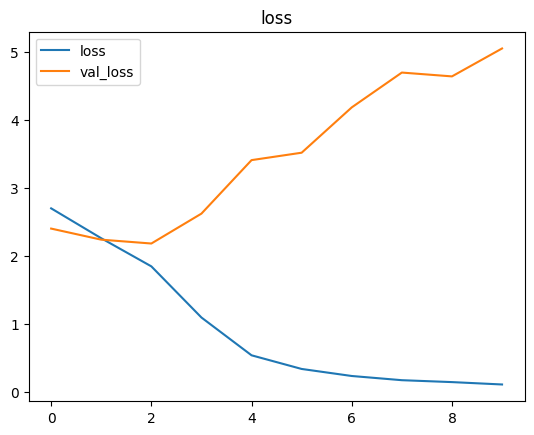

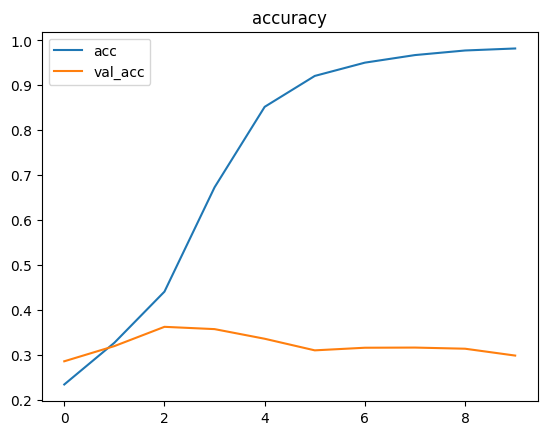

In [ ]:
plot_loss_curve(his_0)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,3])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(23,activation = "softmax")(x)

model_1 = tf.keras.Model(input,output)
model_1.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_1 = model_1.fit(train_data,
                    epochs  = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_1",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
343/343 [==============================] - 31s 87ms/step - loss: 2.6682 - accuracy: 0.2343 - val_loss: 2.4345 - val_accuracy: 0.2695
Epoch 2/10
343/343 [==============================] - 29s 86ms/step - loss: 2.2796 - accuracy: 0.3235 - val_loss: 2.2699 - val_accuracy: 0.3222
Epoch 3/10
343/343 [==============================] - 32s 93ms/step - loss: 1.8250 - accuracy: 0.4574 - val_loss: 2.3984 - val_accuracy: 0.3251
Epoch 4/10
343/343 [==============================] - 32s 93ms/step - loss: 1.0546 - accuracy: 0.6885 - val_loss: 3.0363 - val_accuracy: 0.3113
Epoch 5/10
343/343 [==============================] - 36s 106ms/step - loss: 0.5233 - accuracy: 0.8659 - val_loss: 3.6946 - val_accuracy: 0.3069
Epoch 6/10
343/343 [==============================] - 34s 99ms/step - loss: 0.3062 - accuracy: 0.9365 - val_loss: 4.5511 - val_accuracy: 0.3036
Epoch 7/10
343/343 [==============================] - 30s 86ms/step - loss: 0.2122 - accuracy: 0.9614 - val_loss: 4.3481 - val_accuracy

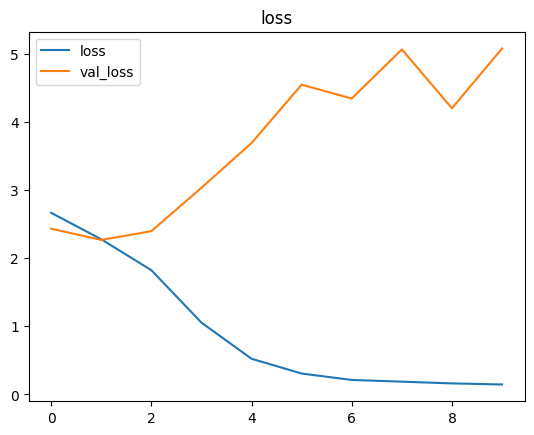

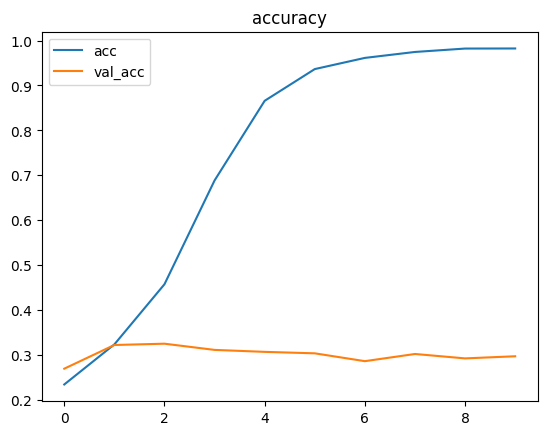

In [ ]:
plot_loss_curve(his_1)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,3])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
# x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(23,activation = "softmax")(x)

model_2 = tf.keras.Model(input,output)
model_2.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_2 = model_2.fit(train_data,
                    epochs  = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_2",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
343/343 [==============================] - 29s 84ms/step - loss: 4.2434 - accuracy: 0.2389 - val_loss: 2.3941 - val_accuracy: 0.3087
Epoch 2/10
343/343 [==============================] - 28s 82ms/step - loss: 1.8326 - accuracy: 0.4809 - val_loss: 2.2854 - val_accuracy: 0.3324
Epoch 3/10
343/343 [==============================] - 28s 82ms/step - loss: 0.8758 - accuracy: 0.7794 - val_loss: 2.4767 - val_accuracy: 0.3433
Epoch 4/10
343/343 [==============================] - 31s 89ms/step - loss: 0.4190 - accuracy: 0.9129 - val_loss: 2.8075 - val_accuracy: 0.3382
Epoch 5/10
343/343 [==============================] - 28s 80ms/step - loss: 0.2750 - accuracy: 0.9525 - val_loss: 2.9698 - val_accuracy: 0.3087
Epoch 6/10
343/343 [==============================] - 28s 81ms/step - loss: 0.2122 - accuracy: 0.9693 - val_loss: 3.4727 - val_accuracy: 0.3025
Epoch 7/10
343/343 [==============================] - 29s 85ms/step - loss: 0.1854 - accuracy: 0.9753 - val_loss: 3.4085 - val_accuracy:

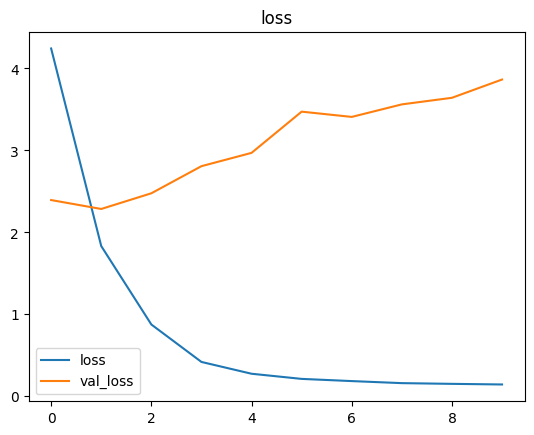

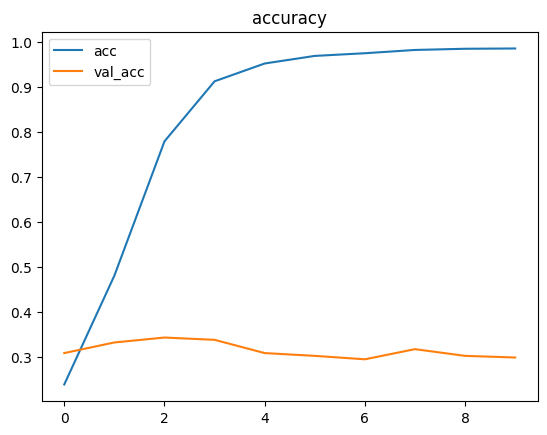

In [ ]:
plot_loss_curve(his_2)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,3])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
# x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.3)(x)
# x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(23,activation = "softmax")(x)

model_3 = tf.keras.Model(input,output)
model_3.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_3 = model_3.fit(train_data,
                    epochs  = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_3",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
343/343 [==============================] - 32s 86ms/step - loss: 4.0244 - accuracy: 0.2328 - val_loss: 2.4176 - val_accuracy: 0.2967
Epoch 2/10
343/343 [==============================] - 29s 85ms/step - loss: 1.7860 - accuracy: 0.4872 - val_loss: 2.2032 - val_accuracy: 0.3535
Epoch 3/10
343/343 [==============================] - 31s 89ms/step - loss: 0.8165 - accuracy: 0.7866 - val_loss: 2.7481 - val_accuracy: 0.3313
Epoch 4/10
343/343 [==============================] - 29s 84ms/step - loss: 0.4060 - accuracy: 0.9131 - val_loss: 2.7907 - val_accuracy: 0.3327
Epoch 5/10
343/343 [==============================] - 28s 80ms/step - loss: 0.2720 - accuracy: 0.9526 - val_loss: 3.2318 - val_accuracy: 0.3236
Epoch 6/10
343/343 [==============================] - 34s 98ms/step - loss: 0.2231 - accuracy: 0.9675 - val_loss: 3.1969 - val_accuracy: 0.3196
Epoch 7/10
343/343 [==============================] - 36s 105ms/step - loss: 0.1969 - accuracy: 0.9743 - val_loss: 3.1830 - val_accuracy

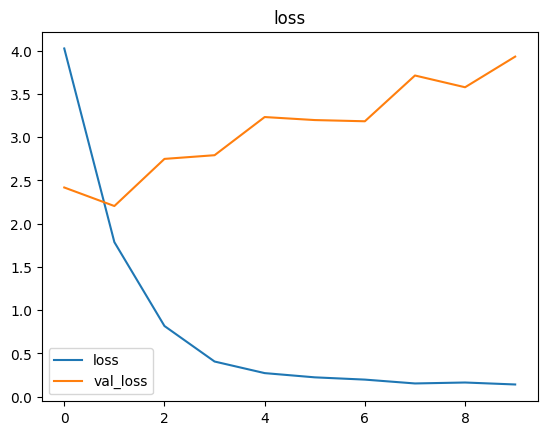

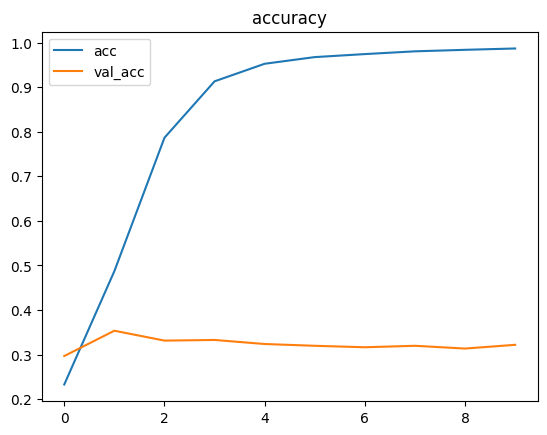

In [ ]:
plot_loss_curve(his_3)

In [ ]:
new_train_gen = ImageDataGenerator(rescale = 1/255.,
                                   height_shift_range = 0.2,
                                   width_shift_range = 2.0,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True
                                   )
new_train_data = new_train_gen.flow_from_directory(directory = train_dir,
                                                   class_mode = "categorical",
                                                   target_size = [224,224],

                                                   )

Found 10961 images belonging to 23 classes.


(-0.5, 223.5, 223.5, -0.5)

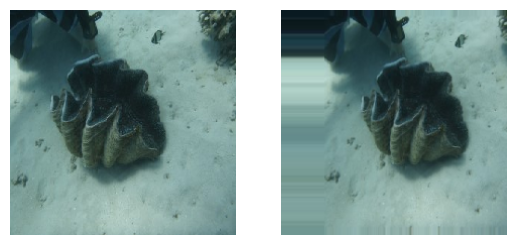

In [ ]:
image,label = train_data[0]
new_image,new_label = new_train_data[0]
rand = random.randint(0,31)
plt.subplot(1,2,1)
plt.imshow(image[rand])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(new_image[rand])
plt.axis(False)

In [ ]:
len(new_image)

32

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,3])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(23,activation = "softmax")(x)

model_4 = tf.keras.Model(input,output)
model_4.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_4 = model_4.fit(new_train_data,
                    epochs  = 10,
                    validation_data = test_data,
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_4",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
343/343 [==============================] - 149s 424ms/step - loss: 2.5983 - accuracy: 0.2473 - val_loss: 2.4070 - val_accuracy: 0.2887
Epoch 2/10
343/343 [==============================] - 145s 424ms/step - loss: 2.3156 - accuracy: 0.3065 - val_loss: 2.2305 - val_accuracy: 0.3251
Epoch 3/10
343/343 [==============================] - 146s 426ms/step - loss: 2.1799 - accuracy: 0.3454 - val_loss: 2.1391 - val_accuracy: 0.3618
Epoch 4/10
343/343 [==============================] - 150s 437ms/step - loss: 2.1147 - accuracy: 0.3641 - val_loss: 2.0204 - val_accuracy: 0.3891
Epoch 5/10
343/343 [==============================] - 148s 432ms/step - loss: 2.0541 - accuracy: 0.3784 - val_loss: 1.9916 - val_accuracy: 0.3920
Epoch 6/10
343/343 [==============================] - 148s 431ms/step - loss: 2.0011 - accuracy: 0.3854 - val_loss: 1.9339 - val_accuracy: 0.4255
Epoch 7/10
343/343 [==============================] - 149s 434ms/step - loss: 1.9619 - accuracy: 0.4102 - val_loss: 1.9298 -

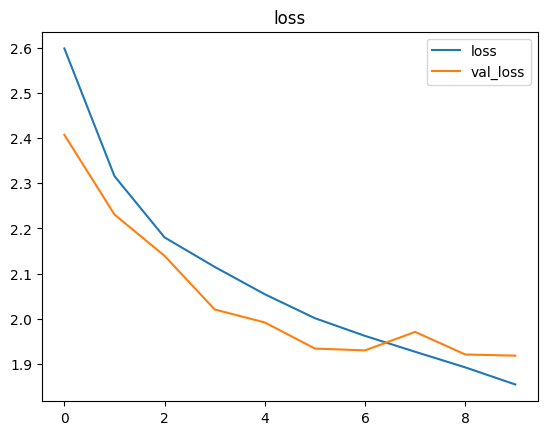

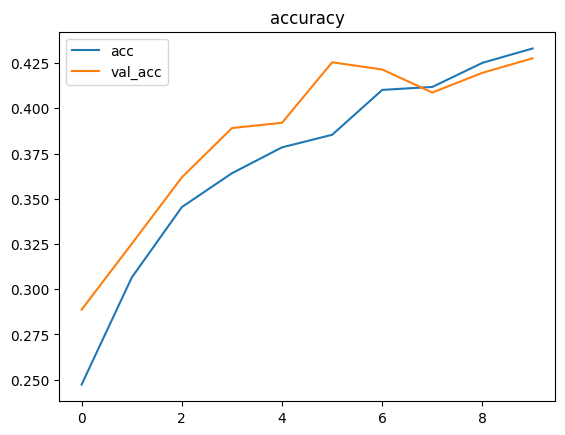

In [ ]:
plot_loss_curve(his_4)

In [ ]:
input = tf.keras.layers.Input(shape = [224,224,3])
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(input)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64,3,activation = "relu")(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,activation = "relu")(x)
output = tf.keras.layers.Dense(23,activation = "softmax")(x)

model_5 = tf.keras.Model(input,output)
model_5.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_5 = model_5.fit(new_train_data,
                    epochs  = 10,
                    validation_data = test_data,
                    validation_steps = int(0.20*len(test_data)),
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_5",
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/10
343/343 [==============================] - 148s 416ms/step - loss: 2.8528 - accuracy: 0.2040 - val_loss: 2.4378 - val_accuracy: 0.2904
Epoch 2/10
343/343 [==============================] - 143s 417ms/step - loss: 2.4218 - accuracy: 0.2758 - val_loss: 2.3040 - val_accuracy: 0.3070
Epoch 3/10
343/343 [==============================] - 143s 418ms/step - loss: 2.2799 - accuracy: 0.3104 - val_loss: 2.0795 - val_accuracy: 0.3750
Epoch 4/10
343/343 [==============================] - 140s 407ms/step - loss: 2.1962 - accuracy: 0.3324 - val_loss: 2.1826 - val_accuracy: 0.3217
Epoch 5/10
343/343 [==============================] - 142s 414ms/step - loss: 2.1333 - accuracy: 0.3488 - val_loss: 2.0533 - val_accuracy: 0.3805
Epoch 6/10
343/343 [==============================] - 143s 418ms/step - loss: 2.0651 - accuracy: 0.3694 - val_loss: 2.0107 - val_accuracy: 0.4007
Epoch 7/10
343/343 [==============================] - 141s 411ms/step - loss: 2.0229 - accuracy: 0.3815 - val_loss: 2.1981 -

In [ ]:
len(test_data),int(0.20*len(test_data))

(86, 17)

In [ ]:
model_5.evaluate(test_data)

86/86 [==============================] - 6s 65ms/step - loss: 1.9035 - accuracy: 0.4185


[1.9034655094146729, 0.4185454547405243]

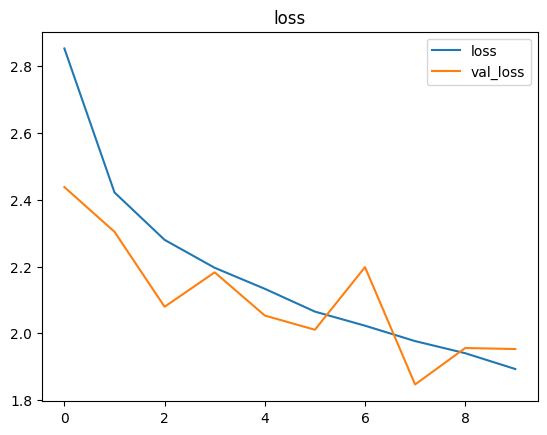

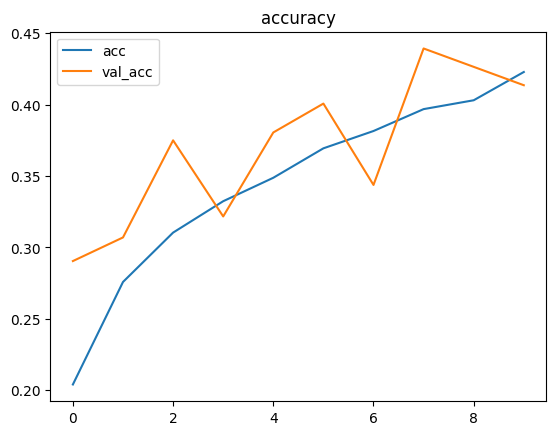

In [ ]:
plot_loss_curve(his_5)

In [ ]:
new_train_data_2 = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                       label_mode = "categorical",
                                                                       image_size = [224,224]
                                                                       )
new_test_data_2 = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                       label_mode = "categorical",
                                                                       image_size = [224,224],

                                                                       )

Found 10961 files belonging to 23 classes.
Found 2750 files belonging to 23 classes.


In [ ]:
test_dir,train_dir

('/content/test_data', '/content/train_data')

In [ ]:
new_train_data_2

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 23), dtype=tf.float32, name=None))>

In [ ]:
for i,l in new_train_data_2.take(1):
  print(l[:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 23), dtype=float32)


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
])

In [ ]:
base_model = tf.keras.applications.EfficientNetB1(include_top=False)
base_model.trainable = False

input = tf.keras.layers.Input(shape = [224,224,3])
x = data_augmentation(input)
x = base_model(x,training = False)
x = tf.keras.layers.GlobalMaxPool2D()(x)
x = tf.keras.layers.Dense(64,activation = "relu")(x)
output = tf.keras.layers.Dense(23,activation = "softmax")(x)

model_7_ = tf.keras.Model(input,output)
model_7_.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_7_ = model_7_.fit(new_train_data_2,
                    epochs = 5,
                    validation_data = new_test_data_2,
                    validation_steps = int(0.2*len(new_test_data_2))
                    )

27018416/27018416 [==============================] - 0s 0us/step
Epoch 1/5
343/343 [==============================] - 226s 618ms/step - loss: 1.3572 - accuracy: 0.6210 - val_loss: 0.8642 - val_accuracy: 0.7574
Epoch 2/5
343/343 [==============================] - 145s 421ms/step - loss: 0.8144 - accuracy: 0.7564 - val_loss: 0.6886 - val_accuracy: 0.7978
Epoch 3/5
343/343 [==============================] - 120s 350ms/step - loss: 0.6995 - accuracy: 0.7885 - val_loss: 0.7367 - val_accuracy: 0.7831
Epoch 4/5
343/343 [==============================] - 111s 324ms/step - loss: 0.6327 - accuracy: 0.8071 - val_loss: 0.7163 - val_accuracy: 0.7794
Epoch 5/5
343/343 [==============================] - 99s 289ms/step - loss: 0.5880 - accuracy: 0.8188 - val_loss: 0.6243 - val_accuracy: 0.8180


In [ ]:
model_7_.evaluate(new_test_data_2)

86/86 [==============================] - 10s 113ms/step - loss: 0.6626 - accuracy: 0.8178


[0.6625643968582153, 0.8178181648254395]

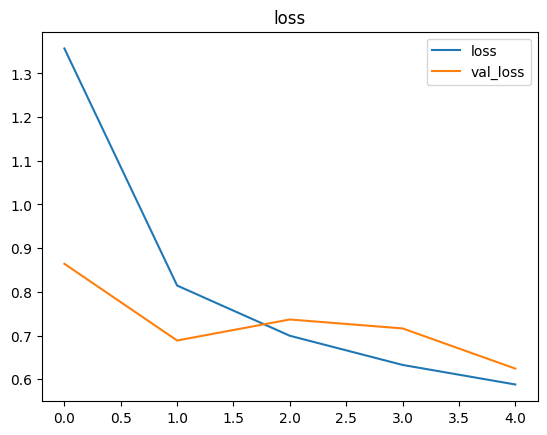

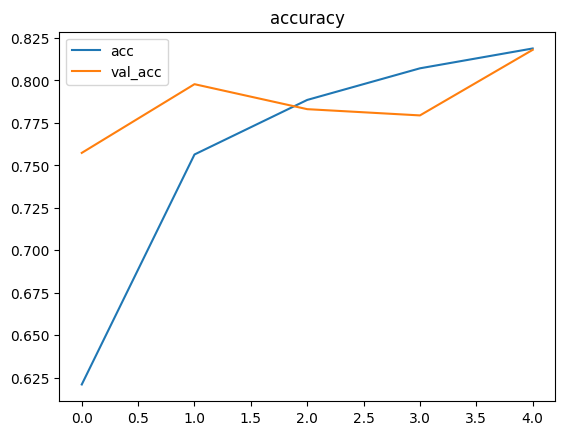

In [ ]:
plot_loss_curve(his_7_)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
for i in base_model.layers[-10:]:
  print(i.trainable)

False
False
False
False
False
True
True
True
True
True


In [ ]:
model_7_.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(0.00001),
                 metrics = ["accuracy"]
                 )
new_his_7 = model_7_.fit(new_train_data_2,
                         epochs = 10,
                         initial_epoch = his_7_.epoch[-1],
                         validation_data = new_test_data_2,
                         validation_steps = int(0.2*len(new_test_data_2))
                         )

Epoch 5/10
343/343 [==============================] - 103s 267ms/step - loss: 0.4890 - accuracy: 0.8489 - val_loss: 0.5445 - val_accuracy: 0.8456
Epoch 6/10
343/343 [==============================] - 80s 233ms/step - loss: 0.4626 - accuracy: 0.8555 - val_loss: 0.5538 - val_accuracy: 0.8456
Epoch 7/10
343/343 [==============================] - 76s 221ms/step - loss: 0.4536 - accuracy: 0.8586 - val_loss: 0.5726 - val_accuracy: 0.8401
Epoch 8/10
343/343 [==============================] - 69s 200ms/step - loss: 0.4502 - accuracy: 0.8583 - val_loss: 0.4940 - val_accuracy: 0.8566
Epoch 9/10
343/343 [==============================] - 69s 202ms/step - loss: 0.4481 - accuracy: 0.8622 - val_loss: 0.5136 - val_accuracy: 0.8548
Epoch 10/10
343/343 [==============================] - 63s 185ms/step - loss: 0.4387 - accuracy: 0.8632 - val_loss: 0.5419 - val_accuracy: 0.8419


In [ ]:
def new_plot_loss_curve(his,his_2):
  loss = his.history["loss"]
  val_loss = his.history["val_loss"]
  accuracy =  his.history["accuracy"]
  val_accuracy = his.history["val_accuracy"]


  loss_2 = his_2.history["loss"]
  val_loss_2 = his_2.history["val_loss"]
  accuracy_2 =  his_2.history["accuracy"]
  val_accuracy_2 = his_2.history["val_accuracy"]

  plt.plot((loss+loss_2),label = "loss")
  plt.plot((val_loss+val_loss_2),label = "val_loss")
  plt.plot([4,4],plt.ylim(),label=  "start_fine_tune")
  plt.title("loss")
  plt.legend()

  plt.figure()

  plt.plot((accuracy+accuracy_2),label = "acc")
  plt.plot((val_accuracy+val_accuracy_2),label = "val_acc")
  plt.plot([4,4],plt.ylim(),label=  "start_fine_tune")
  plt.title("accuracy")
  plt.legend()


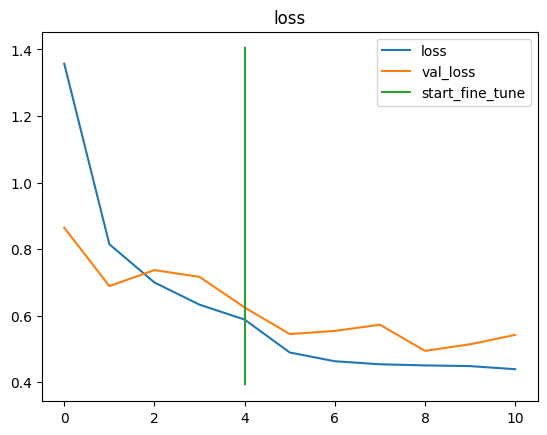

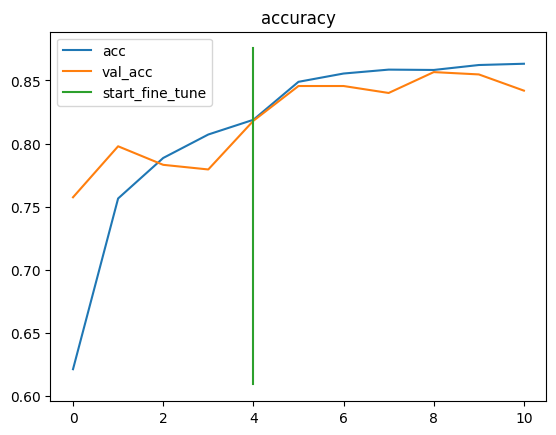

In [ ]:
new_plot_loss_curve(his_7_,new_his_7)

In [ ]:
new_test_data_2 = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                       label_mode = "categorical",
                                                                       image_size = [224,224],
                                                                       shuffle =False
                                                                       )

Found 2750 files belonging to 23 classes.


In [ ]:
y_label = []
for i,l in new_test_data_2.unbatch():
  y_label.append(l.numpy().argmax(-1))

In [ ]:
y_label[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_prob = model_7_.predict(new_test_data_2)

86/86 [==============================] - 10s 82ms/step


In [ ]:
y_prob.argmax(axis=-1)

array([13, 22, 14, ..., 21, 19, 21])

In [ ]:
y_pred = y_prob.argmax(-1)
y_pred[:10]

array([ 0,  1, 17,  0,  0,  0,  0,  6,  4,  0])

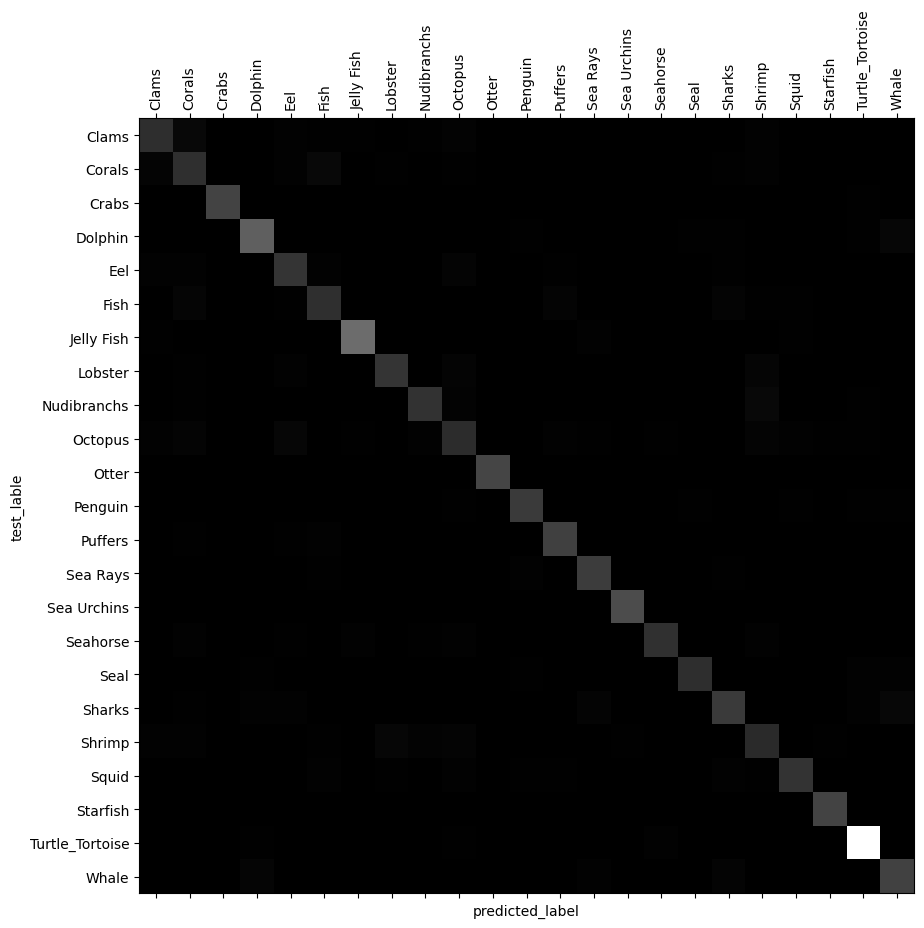

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_label,y_pred)
plt.matshow(cm,cmap = plt.cm.gray)
plt.xticks(np.arange(23),sorted(os.listdir("/content/train_data")),rotation = 90)
plt.yticks(np.arange(23),sorted(os.listdir("/content/train_data")),rotation = 0)
plt.xlabel("predicted_label")
plt.ylabel("test_lable")
axis = plt.gcf()
axis.set_size_inches(10,20)